<a href="https://colab.research.google.com/github/RuzannaRu/02-Data-Science-My-Mr-Clean-/blob/RuzannaRu-mr_clean/My_Mr_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install requests
!pip install beautifulsoup4




{'batchcomplete': '', 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface

{'batchcomplete': '', 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface

In [16]:
from operator import itemgetter
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


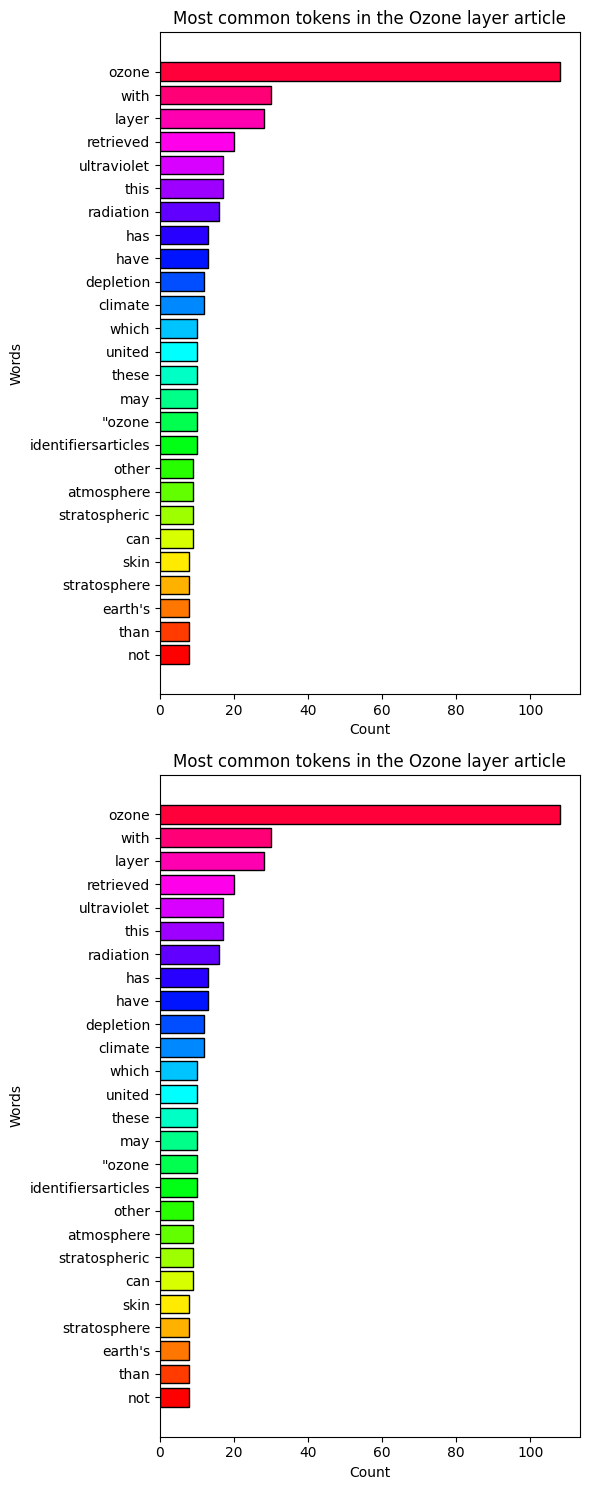

In [19]:
from operator import itemgetter
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_content(data):
  url = 'https://en.wikipedia.org/wiki/Ozone_layer'
  data = requests.get(url)
  return data

def merge_contents(data):
   merge_soup = BeautifulSoup(data.text, "html.parser")
   html_repos = merge_soup.find_all("div", id="bodyContent", class_="vector-body")
   return html_repos

def tokenize(merge_content):
    text = ''
    for content in merge_content:
        text += content.text + ' '
    arranged_words = text.split()
    return arranged_words

def trash_words(collection):
    trash_words = ["the", "a", "of", "to", "in", "about", "and", "is", "by", "^", "that", "from", "on", "for", "was", "at", "as", "are", "it", "be", "uv","nm)", "an"]
    filtered_result = []
    for word in collection:
        if not word.isdigit():
            if word.lower() not in trash_words:
                filtered_result.append(word.lower())
    return filtered_result

def count_frequency(collection_filter):
    word_frequency = {word: collection_filter.count(word) for word in collection_filter}
    sorted_frequency = sorted(word_frequency.items(), key=itemgetter(1), reverse=True)
    words_26 = sorted_frequency[:min(26, len(sorted_frequency))]
    return words_26


def visualization_v(frequencies, ax=None, ascending_order=True):
    visualization = pd.DataFrame.from_dict(frequencies)
    visualization = visualization.rename(columns={0: 'words', 1: 'count'})
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 15))
    visualization = visualization.sort_values(by='count', ascending=ascending_order)
    num_colors = len(visualization)
    hsv_colors = [(i / num_colors, 1, 1) for i in range(num_colors)]
    rgb_colors = [mcolors.hsv_to_rgb(color) for color in hsv_colors]
    ax.barh(visualization['words'], visualization['count'], color=rgb_colors, edgecolor='k')
    ax.set_xlabel('Count')
    ax.set_ylabel('Words')
    ax.set_title('Most common tokens in the Ozone layer article')
    if ax is None:
        plt.show()

def finish():
    url = 'https://en.wikipedia.org/wiki/Ozone_layer'
    data = get_content(url)
    merged_content = merge_contents(data)
    tokenized_content = tokenize(merged_content)
    filtered_content = trash_words(tokenized_content)
    word_frequencies = count_frequency(filtered_content)
    fig, axes = plt.subplots(2, figsize=(6, 15))
    visualization_v(word_frequencies, ax=axes[0], ascending_order=True)
    visualization_v(word_frequencies, ax=axes[1], ascending_order=True)
    plt.tight_layout()
    plt.show()
finish()